In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [86]:
df=pd.read_csv('/content/retail_price.csv')

In [87]:
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [88]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['product_id']=label_encoder.fit_transform(df['product_id']) # Changed 'Product_id' to 'product_id'
df['product_category_name']=label_encoder.fit_transform(df['product_category_name'])
df['month_year']=label_encoder.fit_transform(df['month_year'])

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    int64  
 1   product_category_name       676 non-null    int64  
 2   month_year                  676 non-null    int64  
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

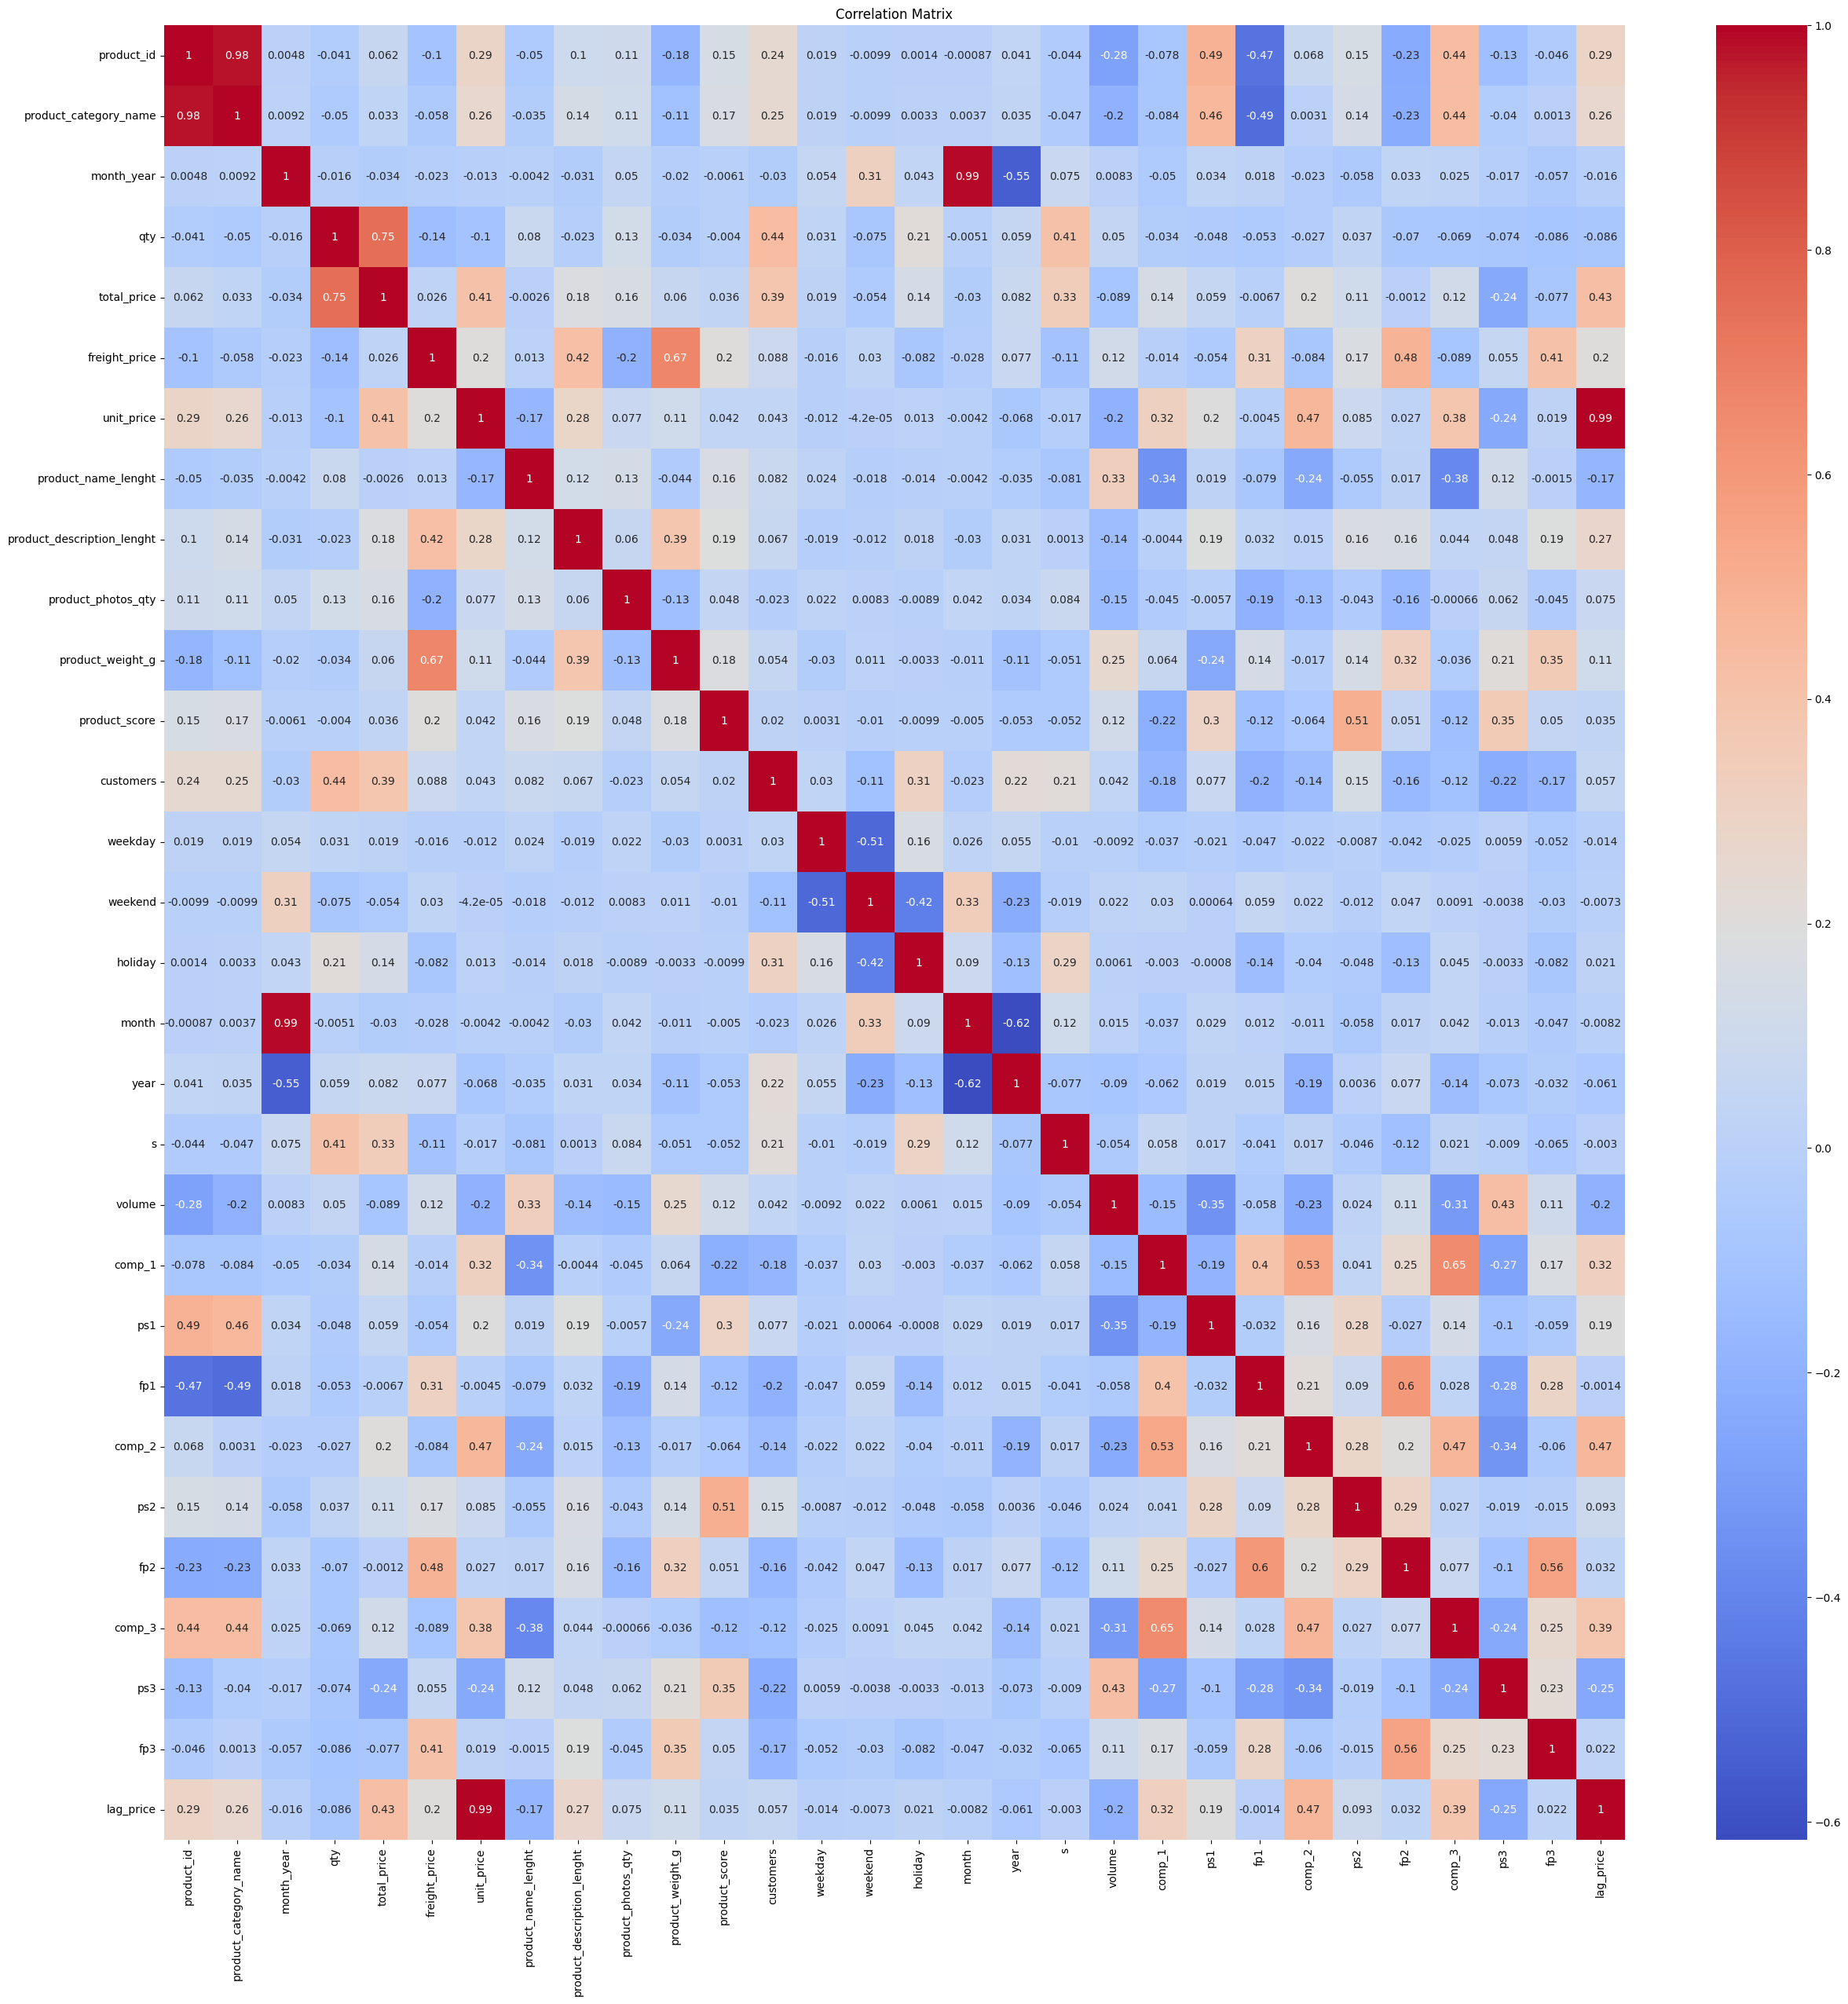

In [90]:
# Plotting the correlation matrix "Heatmap"

# Setting the figure size for the plot
plt.figure(figsize=(30,30))

# Creating a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# df.corr() calculates the correlation coefficients between numerical features
# annot=True adds the correlation values on the heatmap
# cmap='coolwarm' sets the color palette for the heatmap

# Adding a title to the heatmap
plt.title('Correlation Matrix')
# Displaying the heatmap
plt.show()

In [91]:
x=df.drop(['lag_price'],axis=1)
y=df['lag_price']

In [92]:
'''x=df.drop(['comp_1','fp2','fp3','fp1','s','volume','product_description_lenght','freight_price','holiday','customers','product_weight_g','product_photos_qty','qty','month_year','lag_price','ps1','product_id', 'ps2','' 'ps3','weekday','product_score','month','product_category_name','product_name_lenght','year'],axis=1)
y=df['lag_price']'''

"x=df.drop(['comp_1','fp2','fp3','fp1','s','volume','product_description_lenght','freight_price','holiday','customers','product_weight_g','product_photos_qty','qty','month_year','lag_price','ps1','product_id', 'ps2','' 'ps3','weekday','product_score','month','product_category_name','product_name_lenght','year'],axis=1)\ny=df['lag_price']"

In [110]:
x=df.drop(['unit_price','lag_price','product_id','product_category_name','month_year'],axis=1)

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#initialize VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor (x.values, i)
for i in range(len(x.columns))]
print(vif_data)

                       feature          VIF
0                          qty     6.394607
1                  total_price     5.729589
2                freight_price    15.277065
3          product_name_lenght    43.986266
4   product_description_lenght     3.886139
5           product_photos_qty     3.802381
6             product_weight_g     4.013070
7                product_score   615.756262
8                    customers     5.280723
9                      weekday   728.006995
10                     weekend   324.803293
11                     holiday     5.747475
12                       month     6.398516
13                        year  3952.325550
14                           s     3.422211
15                      volume     4.705251
16                      comp_1    12.958115
17                         ps1  2228.916662
18                         fp1    12.167437
19                      comp_2     9.564953
20                         ps2   805.862656
21                         fp2  

In [112]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
'''train_test_split function: This function takes the input data (x and y)
 and splits it into four parts.
 test_size=0.2:Here, it's set to 0.2,
  meaning 20% of the data will be used for testing.'''

"train_test_split function: This function takes the input data (x and y)\n and splits it into four parts.\n test_size=0.2:Here, it's set to 0.2,\n  meaning 20% of the data will be used for testing."

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
score_lr = 100*lr_clf.score(x_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

LR Model score = 65.7289%
R2 Score :  48.21 %


In [115]:
# prompt: DEcision tree Regressor model score

from sklearn.tree import DecisionTreeRegressor

dt_clf = DecisionTreeRegressor()
dt_clf.fit(x_train, y_train)
score_dt = 100 * dt_clf.score(x_test, y_test)
print(f'Decision Tree Regressor Model score = {score_dt:4.4f}%')

y_pred_dt = dt_clf.predict(x_test)
R2_Score_dt = round(r2_score(y_pred_dt, y_test) * 100, 2)
print("Decision Tree Regressor R2 Score : ", R2_Score_dt, "%")


Decision Tree Regressor Model score = 64.1357%
Decision Tree Regressor R2 Score :  68.05 %


In [114]:
# prompt: randomforest model score mean cross validation not the r2 score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

rf_clf = RandomForestRegressor()
rf_clf.fit(x_train, y_train)
score_rf = 100 * rf_clf.score(x_test, y_test)
print(f'Random Forest Regressor Model score = {score_rf:4.4f}%')
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr = rfr.predict(x_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

Random Forest Regressor Model score = 93.4705%
R2 Score :  92.12 %


In [116]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from numpy import mean

gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(x_train, y_train)

# Cross-validation score as percentage
cv = cross_val_score(gbr, x_train, y_train, cv=5)
mean_cv_score = mean(cv) * 100
print(f"Mean Cross-Validation Score: {mean_cv_score:.2f}%")

# R2 score as percentage
y_pred_gbr = gbr.predict(x_test)
R2_Score_gbr = round(r2_score(y_pred_gbr, y_test) * 100, 2)
print(f"R2 Score: {R2_Score_gbr}%")

Mean Cross-Validation Score: 92.11%
R2 Score: 90.84%
